HISTOGRAM CALCULATION

(1197, 2000, 3)


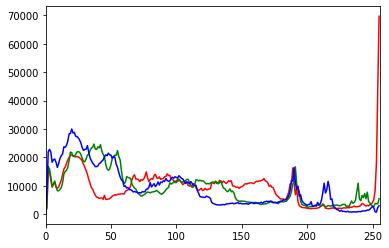

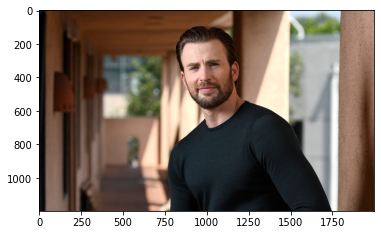

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img=cv.imread('image4.jpg',cv.IMREAD_COLOR)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
color=['r','g','b']
for i,c in enumerate(color):
    hist= cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=c)
    plt.xlim(0,256)
plt.show()
plt.imshow(img)

(1197, 2000)


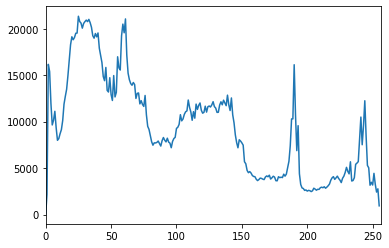

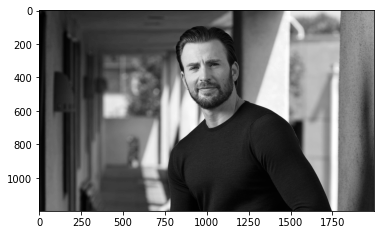

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img=cv.imread('image4.jpg',cv.IMREAD_GRAYSCALE)
print(img.shape)
img=cv.add(img,0)
#plt.imshow(img,cmap='gray')
hist= cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim(0,256)
plt.show()
plt.imshow(img,cmap='gray')

HISTOGRAM EQUALIZATION

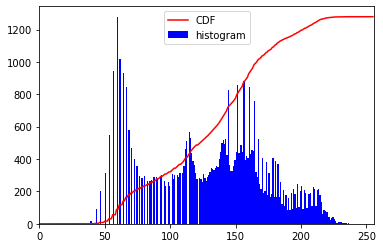

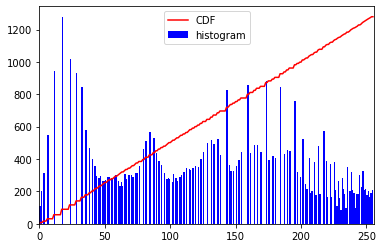

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt



img_original= cv.imread('lena.jpg',cv.IMREAD_GRAYSCALE)
# before eqaulization
hist, bins = np.histogram(img_original.flatten(),256,[0,256])
cdf_original=hist.cumsum()
cdf_ori_norm=cdf_original*(hist.max()/cdf_original.max())
plt.plot(cdf_ori_norm,color='r')
plt.hist(img_original.flatten(),256,[0,256],color='b')
plt.legend(('CDF','histogram'),loc='upper center')
plt.xlim(0,256)
plt.show()
#equalization process
cdf_processed = np.ma.masked_equal(cdf_original,0)
print(cdf_compressed)
cdf_processed = ((cdf_processed-cdf_processed.min())*255)/(cdf_processed.max()-cdf_processed.min())
cdf_processed = np.ma.filled(cdf_processed,0).astype('uint8')
img_processed = cdf_processed[img_original]

hist, bins = np.histogram(img_processed.flatten(),256,[0,256])
cdf_processed=hist.cumsum()
cdf_pro_norm=cdf_processed*(hist.max()/cdf_processed.max())
plt.plot(cdf_pro_norm,color='r')
plt.hist(img_processed.flatten(),256,[0,256],color='b')
plt.legend(('CDF','histogram'),loc='upper center')
plt.xlim(0,256)
plt.show()

#cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img_original)
#cv.namedWindow('Histogram Equalized Image')
cv.imshow('processed',img_processed)
cv.waitKey(0)
cv.destroyAllWindows() 



TRANSFOMATIONS

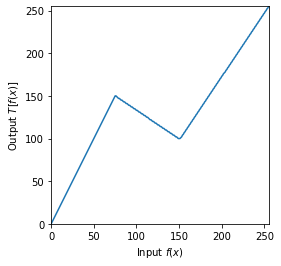

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#create tranform
F1 = np.linspace(0,150,75+1)
F2 = np.linspace(150,100,75)
F3 = np.linspace(100,255,105)
transform=np.concatenate((F1,F2,F3),axis=0).astype('uint8')
plt.plot(transform) 
#apply transformation
ori_img= cv.imread('image3.jpg',cv.IMREAD_COLOR)
img_Transformed = transform[ori_img]

plt.xlim(0,255)
plt.ylim(0,255)
plt.axes().set_aspect('equal')
plt.xlabel('Input $f(x)$')
plt.ylabel('Output $T[f(x)]$')
plt.show()


cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',ori_img)
cv.waitKey(0)

cv.namedWindow('transformed',cv.WINDOW_AUTOSIZE)
cv.imshow('transformed',img_Transformed)


cv.waitKey(0)
cv.destroyAllWindows() 



GAMMA CORRECTION

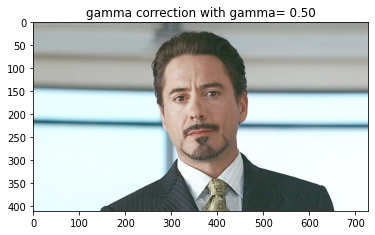

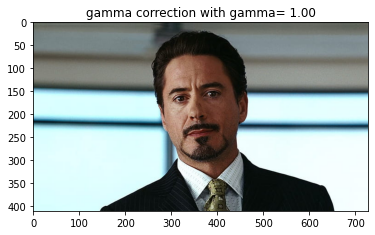

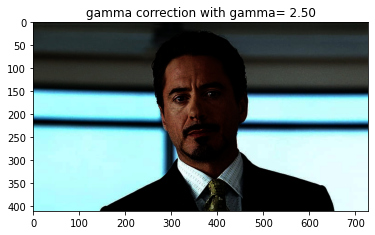

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
def Gamma_correction(image,gamma=1.0):
    table=(((np.arange(0,256)/255)**gamma)*255).astype('uint8')
    gamma_image=table[image]
    return gamma_image

gammas=[0.5,1.0,2.5]
for g in gammas:
    image= cv.imread('image3.jpg',cv.IMREAD_COLOR)
    image_gamma=Gamma_correction(image,g)
    image_gamma=cv.cvtColor(image_gamma,cv.COLOR_BGR2RGB)
    plt.imshow(image_gamma)
    plt.title('gamma correction with gamma= %.2f'%(g))
    plt.show()

